Seed set to 42


2024-04-24 13:41:26 | INFO |    OS: Windows
2024-04-24 13:41:26 | INFO |    Training Dataset filepath: ./data/zinc.csv


100%|██████████| 79570/79570 [00:00<00:00, 294181.06it/s]


2024-04-24 13:41:34 | INFO |    Loading training SMILES data.


1511811it [00:07, 194078.48it/s]


2024-04-24 13:41:42 | INFO |    Data size: torch.Size([1511811, 104])
2024-04-24 13:41:42 | INFO |    
2024-04-24 13:41:42 | INFO |    Loading validation SMILES data.


79570it [00:00, 191652.16it/s]

2024-04-24 13:41:42 | INFO |    Data size: torch.Size([79570, 104])
2024-04-24 13:41:42 | INFO |    
2024-04-24 13:41:42 | INFO |    All vocabulary: 
2024-04-24 13:41:42 | INFO |    ['pad', 'sos', 'eos', '[O+]', '[O]', '[OH+]', '[CH]', '(', '3', '[Se]', '[F+]', '[NH-]', 'c', '%12', '[Br+2]', '[P+]', '9', 'B', '1', '5', '[CH2+]', '[Se-]', '%10', '[PH]', '[b-]', '[SiH]', '[SH-]', '[H]', '[nH+]', '[I+3]', '[I-]', '[SeH2]', 'n', '[SiH-]', '[Cl+2]', '[nH]', '[BH-]', '[C+]', '[NH3+]', 's', '2', '[Br-]', '8', '[cH+]', '[I+]', '[SeH]', '[N+]', '[B-]', '[NH+]', '[PH2+]', 'I', '[SH]', '[SiH2]', '%11', ')', '[CH-]', 'P', '[S+]', '[P-]', '[CH2]', '[Cl+3]', 'F', '#', '[se]', '[IH2]', '[cH-]', '[N-]', '[SH+]', '[NH2+]', '[s+]', '=', 'o', '[BH3-]', '[CH+]', 'b', '[S-]', '[C-]', '7', '[Cl-]', 'N', '[c+]', '[Se+]', '[I+2]', '-', '[n+]', 'Br', '[B]', 'O', '[O-]', 'p', '6', '[Cl+]', '[o+]', 'S', '[c-]', '[BH2-]', '4', 'C', '[F-]', '[n-]', '[N]', '[se+]', '[Si]', 'Cl', '[Si-]']
2024-04-24 13:41:42 | INFO 


100%|██████████| 1/1 [00:00<?, ?it/s]

2024-04-24 13:41:42 | INFO |    tensor([  1,  97,  97,  12,  18,  32,  12,  40,  12,  12,   7, 103,  54,  12,
         12,  32,  40,  12,  18,  97,   7,  70,  87,  54,  79,  97,  12,  18,
         12,  12,  12,   7,  87,  97,  12,  40,  12,  12,  12,   7,  87,  97,
          7,  61,  54,   7,  61,  54,  61,  54,  12,  12,  40,  54,  12,  12,
         18,   2])



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | loss_func | CrossEntropyLoss | 0     
1 | model     | SmilesVAE        | 3.5 M 
-----------------------------------------------
3.5 M     Trainable params
0         Non-trainable params
3.5 M     Total params
13.928    Total estimated model params size (MB)
Epoch 1: 100%|██████████| 11811/11811 [06:17<00:00, 31.31it/s, loss=25.243, val_loss=

2024-04-24 13:48:06 | INFO |    Training Finished!!!
2024-04-24 13:48:07 | INFO |    success rate: 0.639


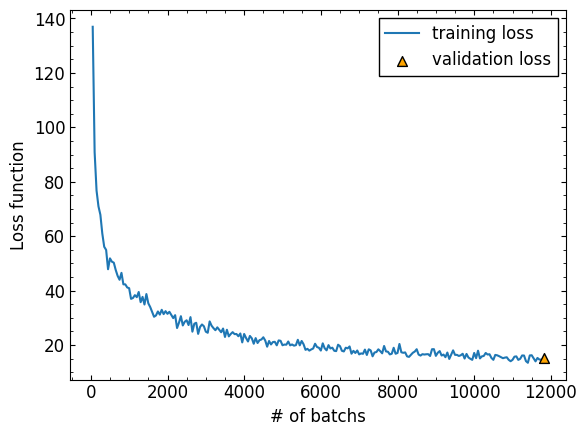

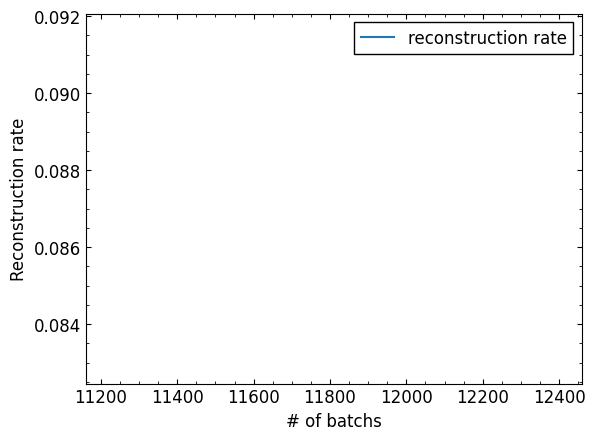

In [1]:
import warnings
from src import train

warnings.simplefilter("ignore")

train.main(config_filepath="./configs/setting.yaml")

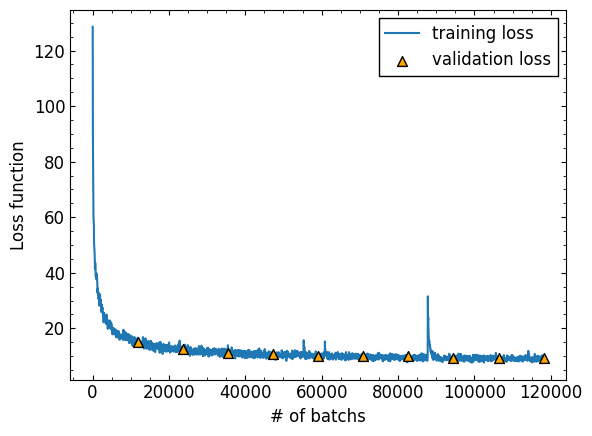

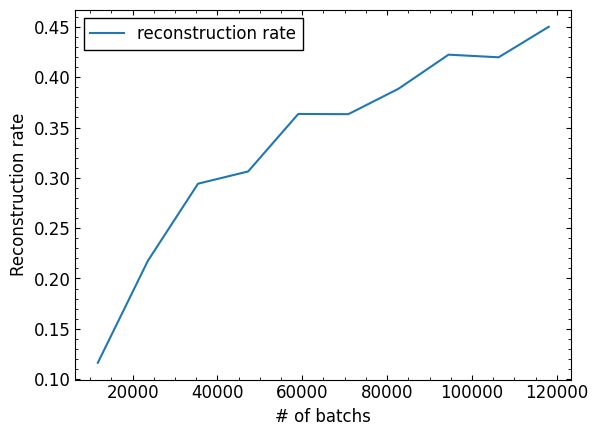

In [9]:
import polars as pl
import os
from src import plot

training_dir = "./reports/training"
img_dir = "./reports/images"

metrics_df = pl.read_csv(
    os.path.join(training_dir, "version_0/metrics.csv")
)
train_loss = metrics_df.select("step", "train_loss_step").drop_nulls().cast(dtypes=pl.Float32)
valid_loss = metrics_df.select("step", "valid_loss").drop_nulls().cast(dtypes=pl.Float32)
reconstruction_rate = metrics_df.select(
    "step", "success_rate"
).drop_nulls().cast(dtypes=pl.Float32)
plot.plot_minibatch_loss(train_loss, valid_loss, img_dir)
plot.plot_reconstruction_rate(reconstruction_rate, img_dir)

In [7]:
metrics_df.select("success_rate").drop_nulls().cast(dtypes=pl.Float32)

success_rate
f32
0.116262
0.217683
0.294181
0.306334
0.363441
0.363252
0.38845
0.422358
0.419744
